In [6]:
# importing necesdsary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("heart_disease.csv")
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 15)

In [9]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data = data.drop (['Unnamed: 0'], axis=1)

In [14]:
data.shape

(303, 14)

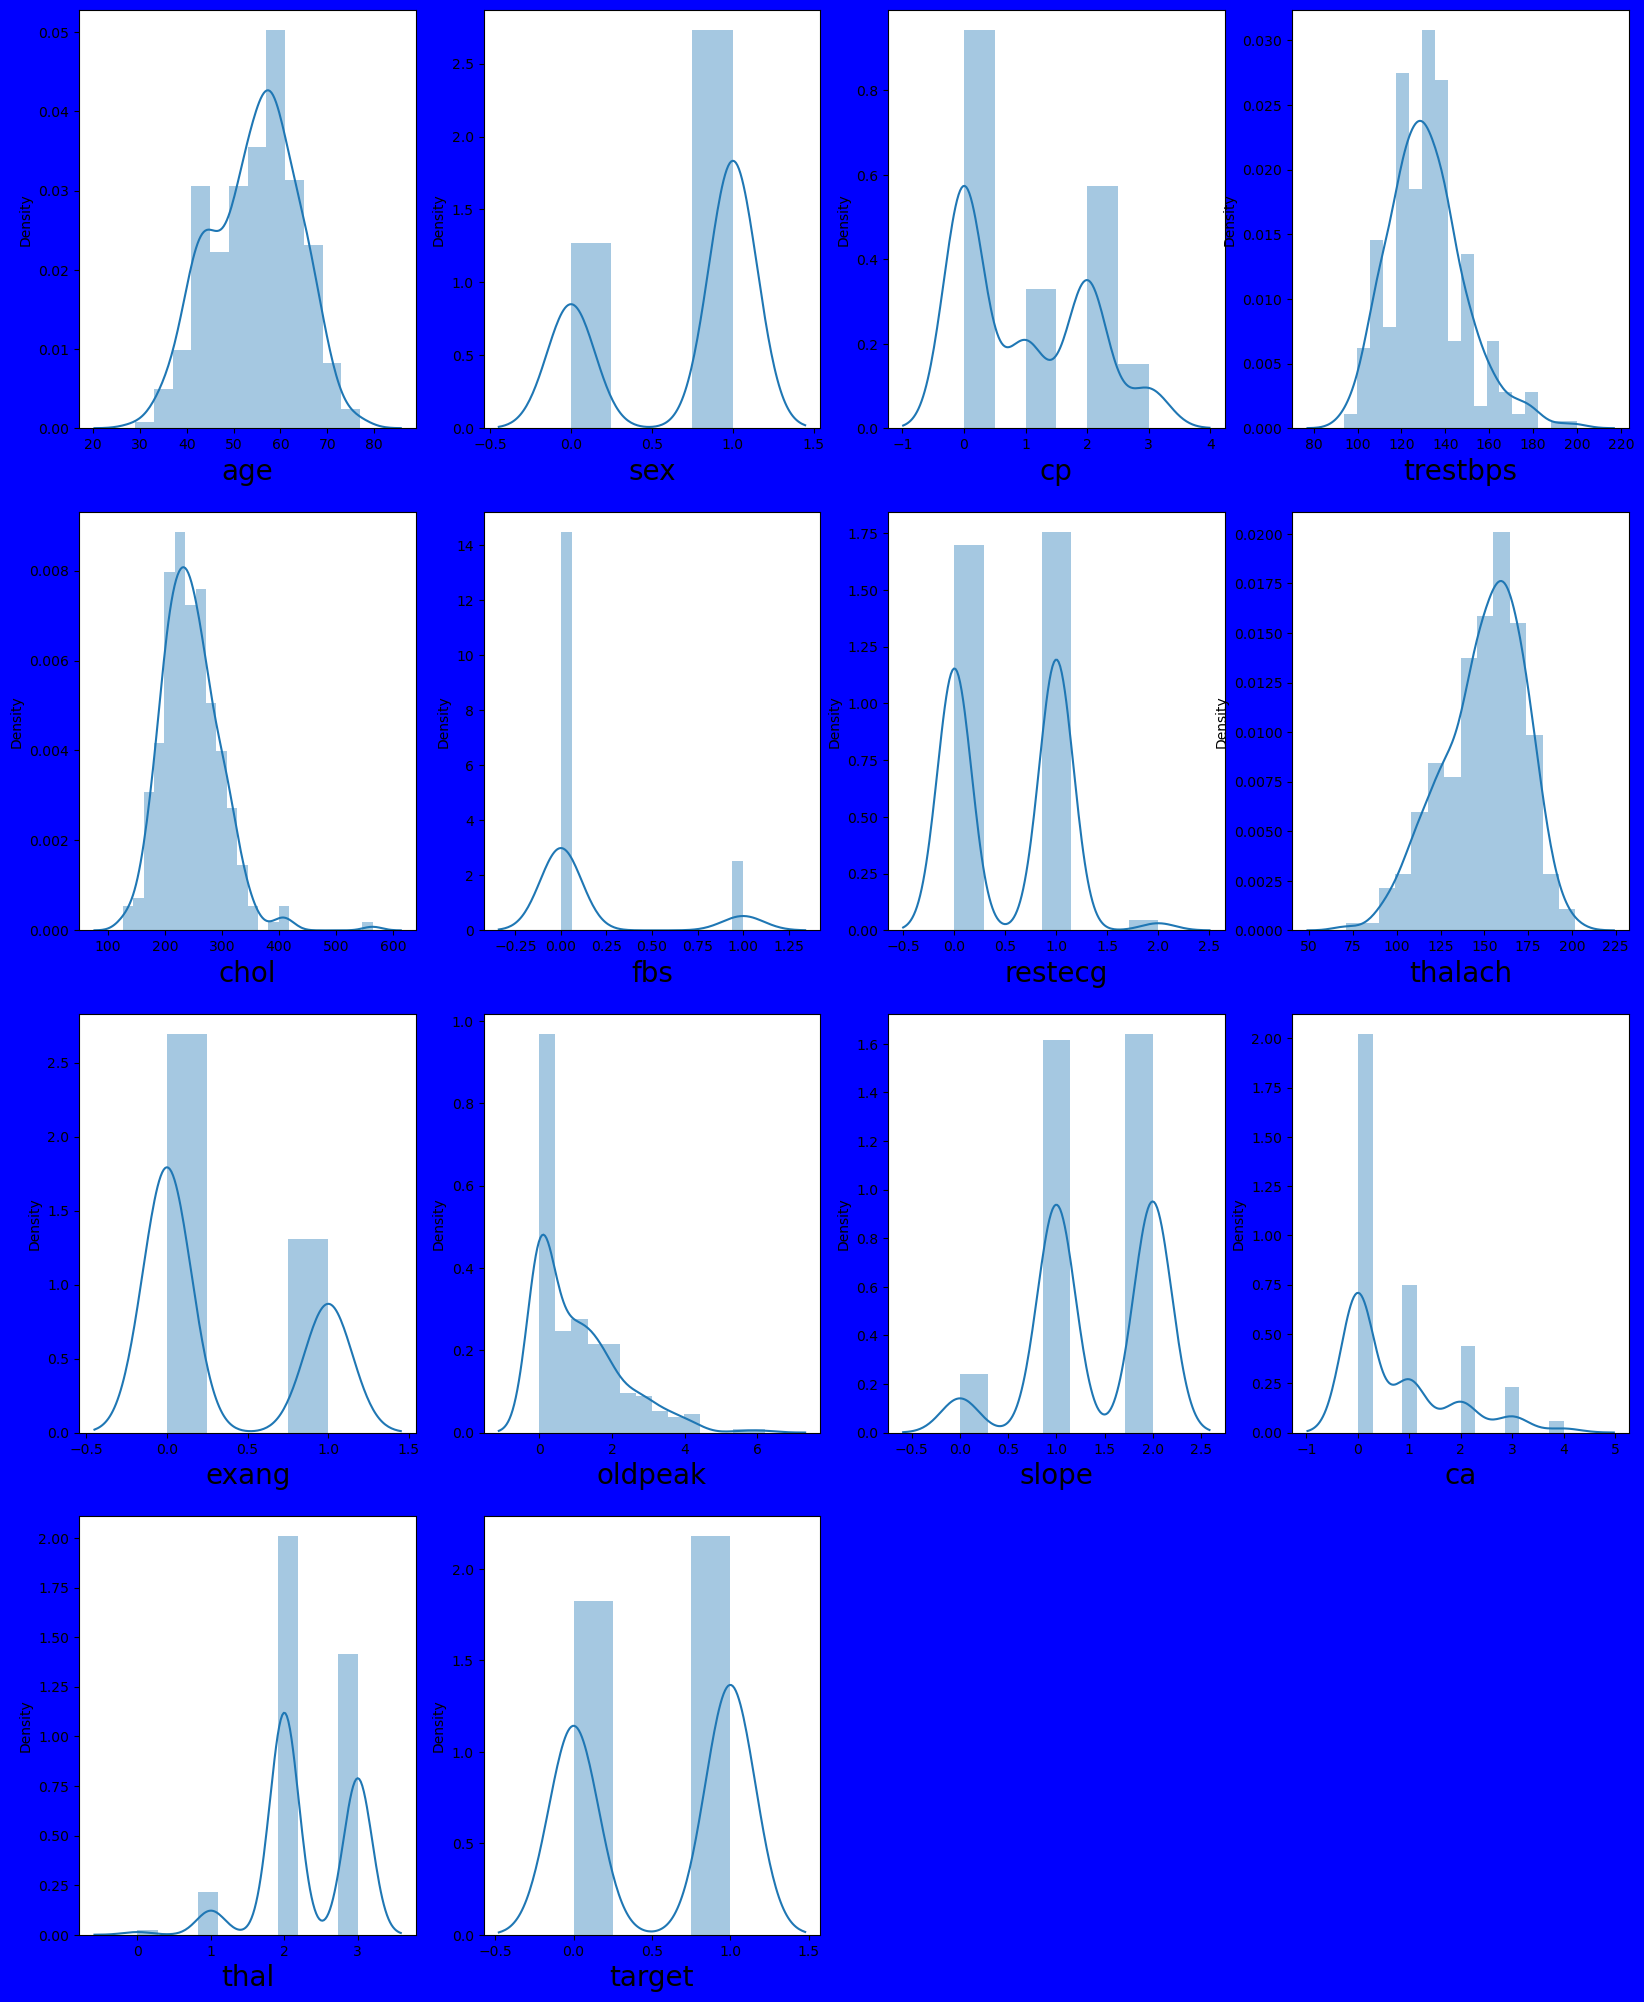

In [15]:
# distribution of data

plt.figure(figsize=(20,25), facecolor='blue')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [17]:
df_features = data.drop('target', axis=1)

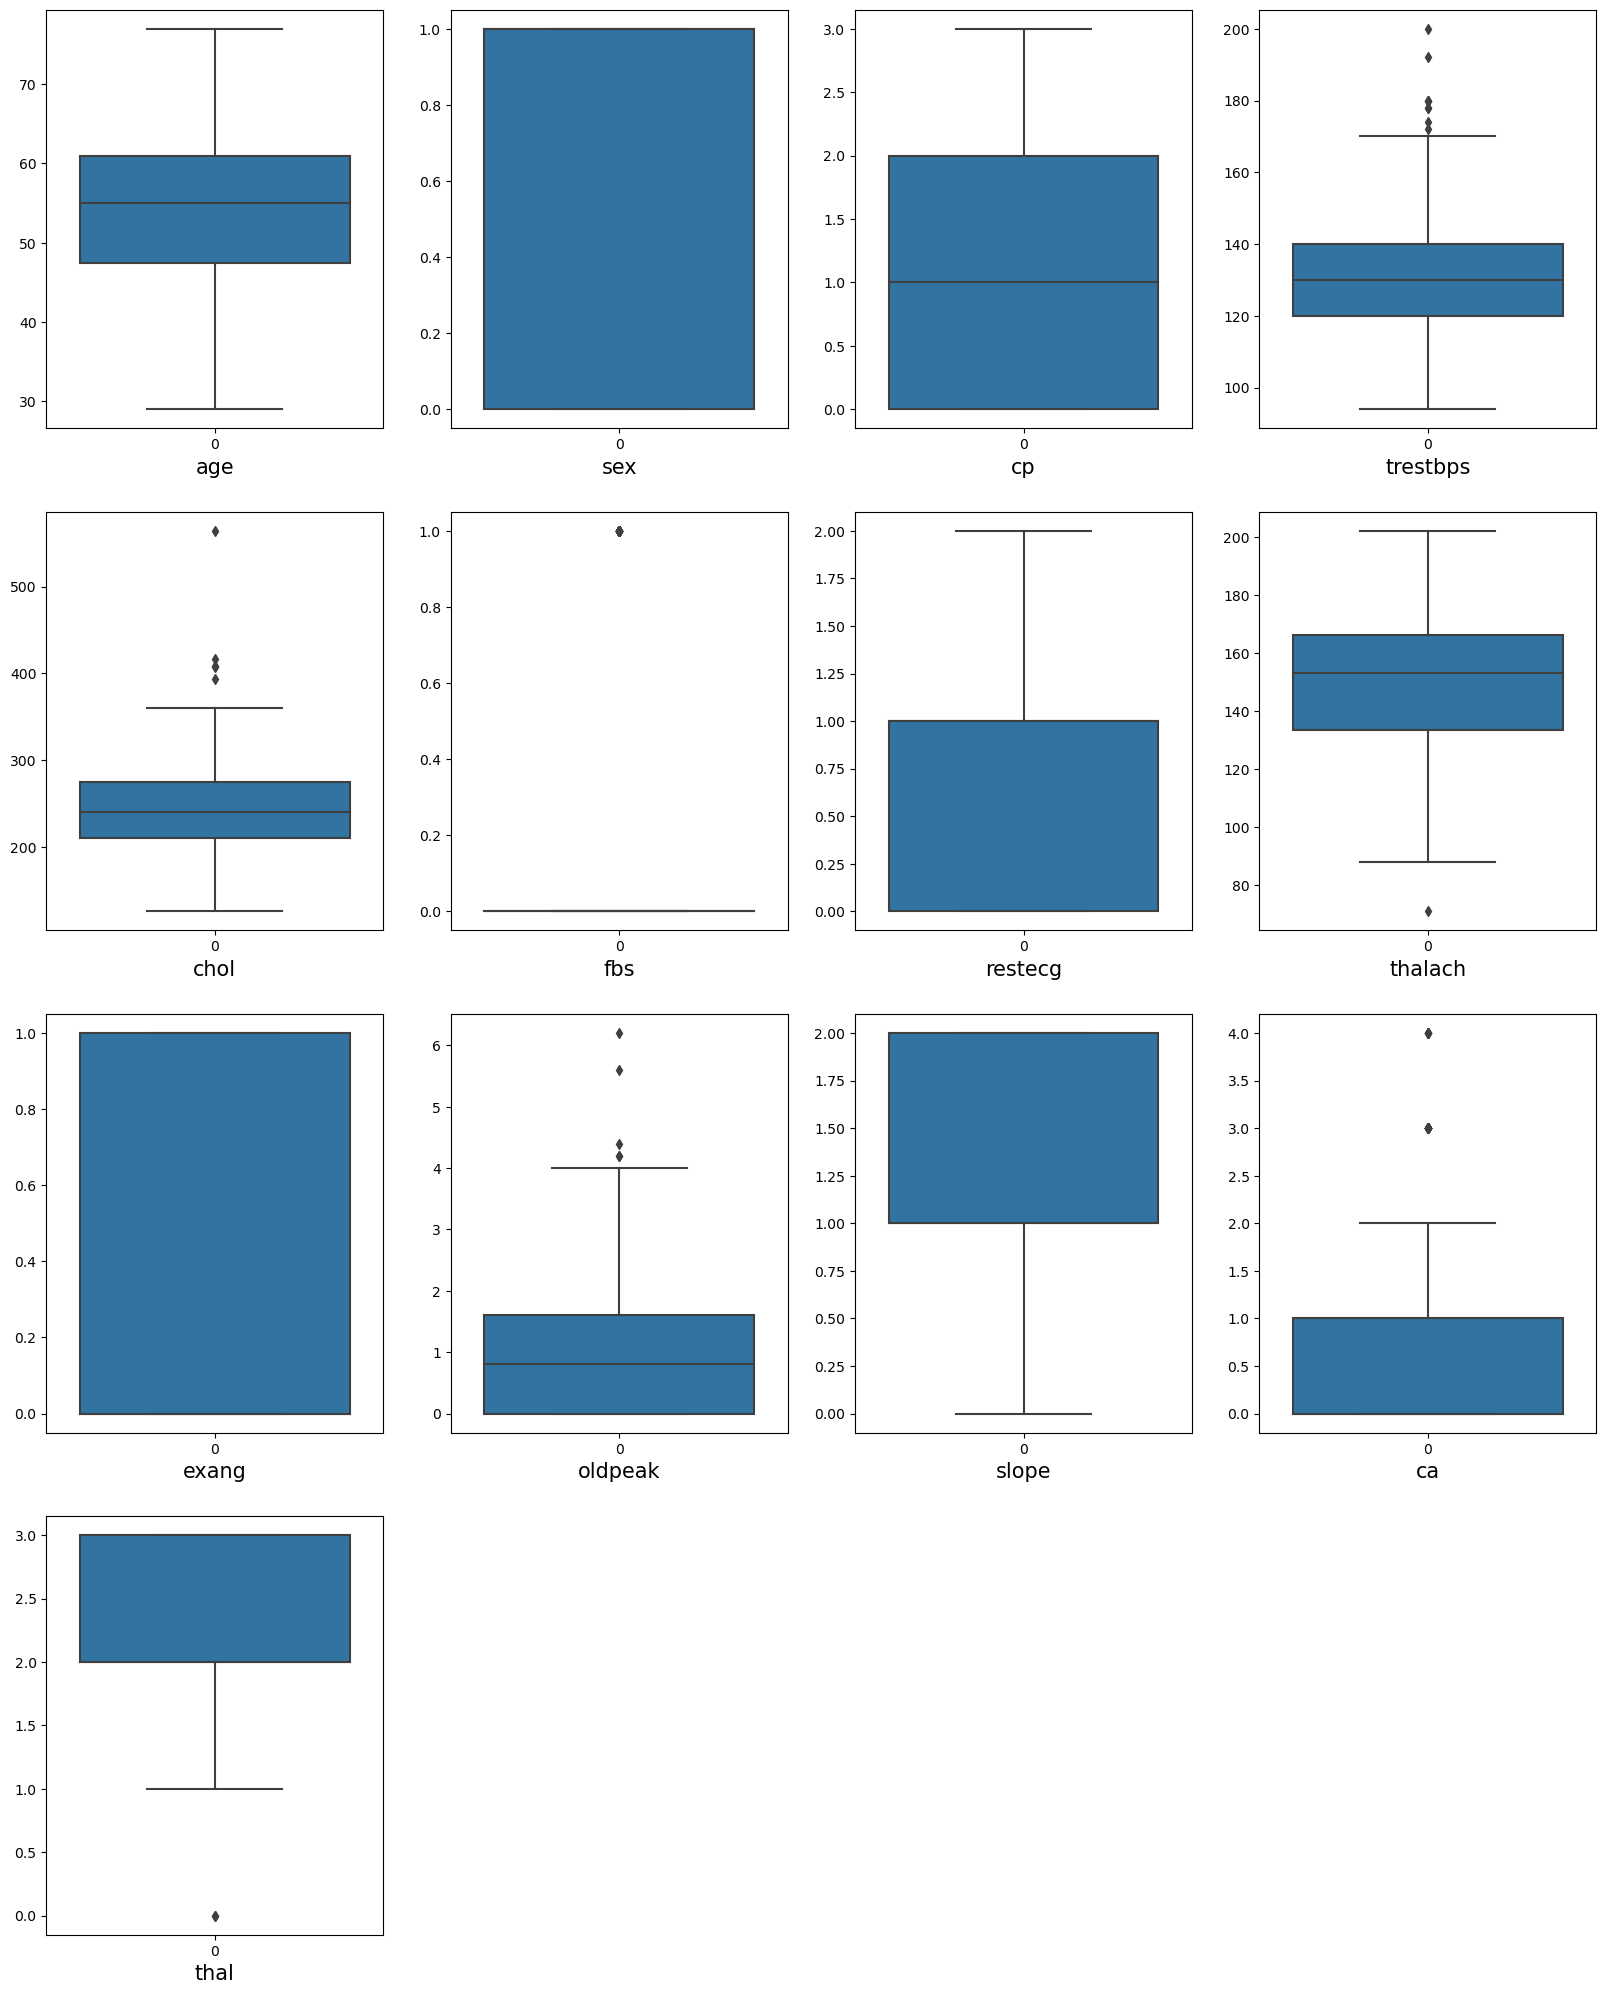

In [18]:
# visualizing the outliers

plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=14 :
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()

In [19]:
data.shape

(303, 14)

In [20]:
# finding the IQR to identify outliers

#1st quantile
q1 = data.quantile(0.25)

#3rd quantile
q3 = data.quantile(0.75)

#IQR
iqr = q3-q1

In [21]:
q1

age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

In [23]:
#validating outliers
trestbps_high = (q3.trestbps + (1.5 * iqr.trestbps))
trestbps_high

170.0

In [24]:
#checking the indexes which have higher values
np_index = np.where (data['trestbps'] > trestbps_high)
np_index

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)

In [25]:
# droping the index which I found in the above cell
data=data.drop(data.index[np_index])

In [26]:
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
chol_high = (q3.chol + (1.5 * iqr.chol))
chol_high

369.75

In [28]:
np_index = np.where (data['chol'] > chol_high)
np_index

(array([ 27,  84,  95, 216, 240], dtype=int64),)

In [29]:
data=data.drop(data.index[np_index])

In [30]:
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [31]:
fbs_high = (q3.trestbps + (1.5 * iqr.fbs))
fbs_high

140.0

In [32]:
np_index = np.where (data['fbs'] > fbs_high)
np_index

(array([], dtype=int64),)

In [33]:
data=data.drop(data.index[np_index])

In [34]:
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
oldpeak_high = (q3.oldpeak + (1.5 * iqr.oldpeak))
oldpeak_high

4.0

In [36]:
np_index = np.where (data['oldpeak'] > oldpeak_high)
np_index

(array([197, 213, 238, 277], dtype=int64),)

In [37]:
data=data.drop(data.index[np_index])
data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
281,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
282,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
283,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
ca_high = (q3.ca + (1.5 * iqr.ca))
ca_high

np_index = np.where (data['ca'] > ca_high)
np_index

data=data.drop(data.index[np_index])

data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
260,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
261,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
262,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
thalach_low = (q1.thalach - (1.5 * iqr.thalach))
thalach_low

np_index = np.where (data['thalach'] < thalach_low)
np_index

data=data.drop(data.index[np_index])

data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
259,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
260,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
261,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
thal_low = (q1.thal - (1.5 * iqr.thal))
thal_low

np_index = np.where (data['thal'] < thal_low)
np_index

data=data.drop(data.index[np_index])

data.reset_index()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
257,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
258,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
259,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


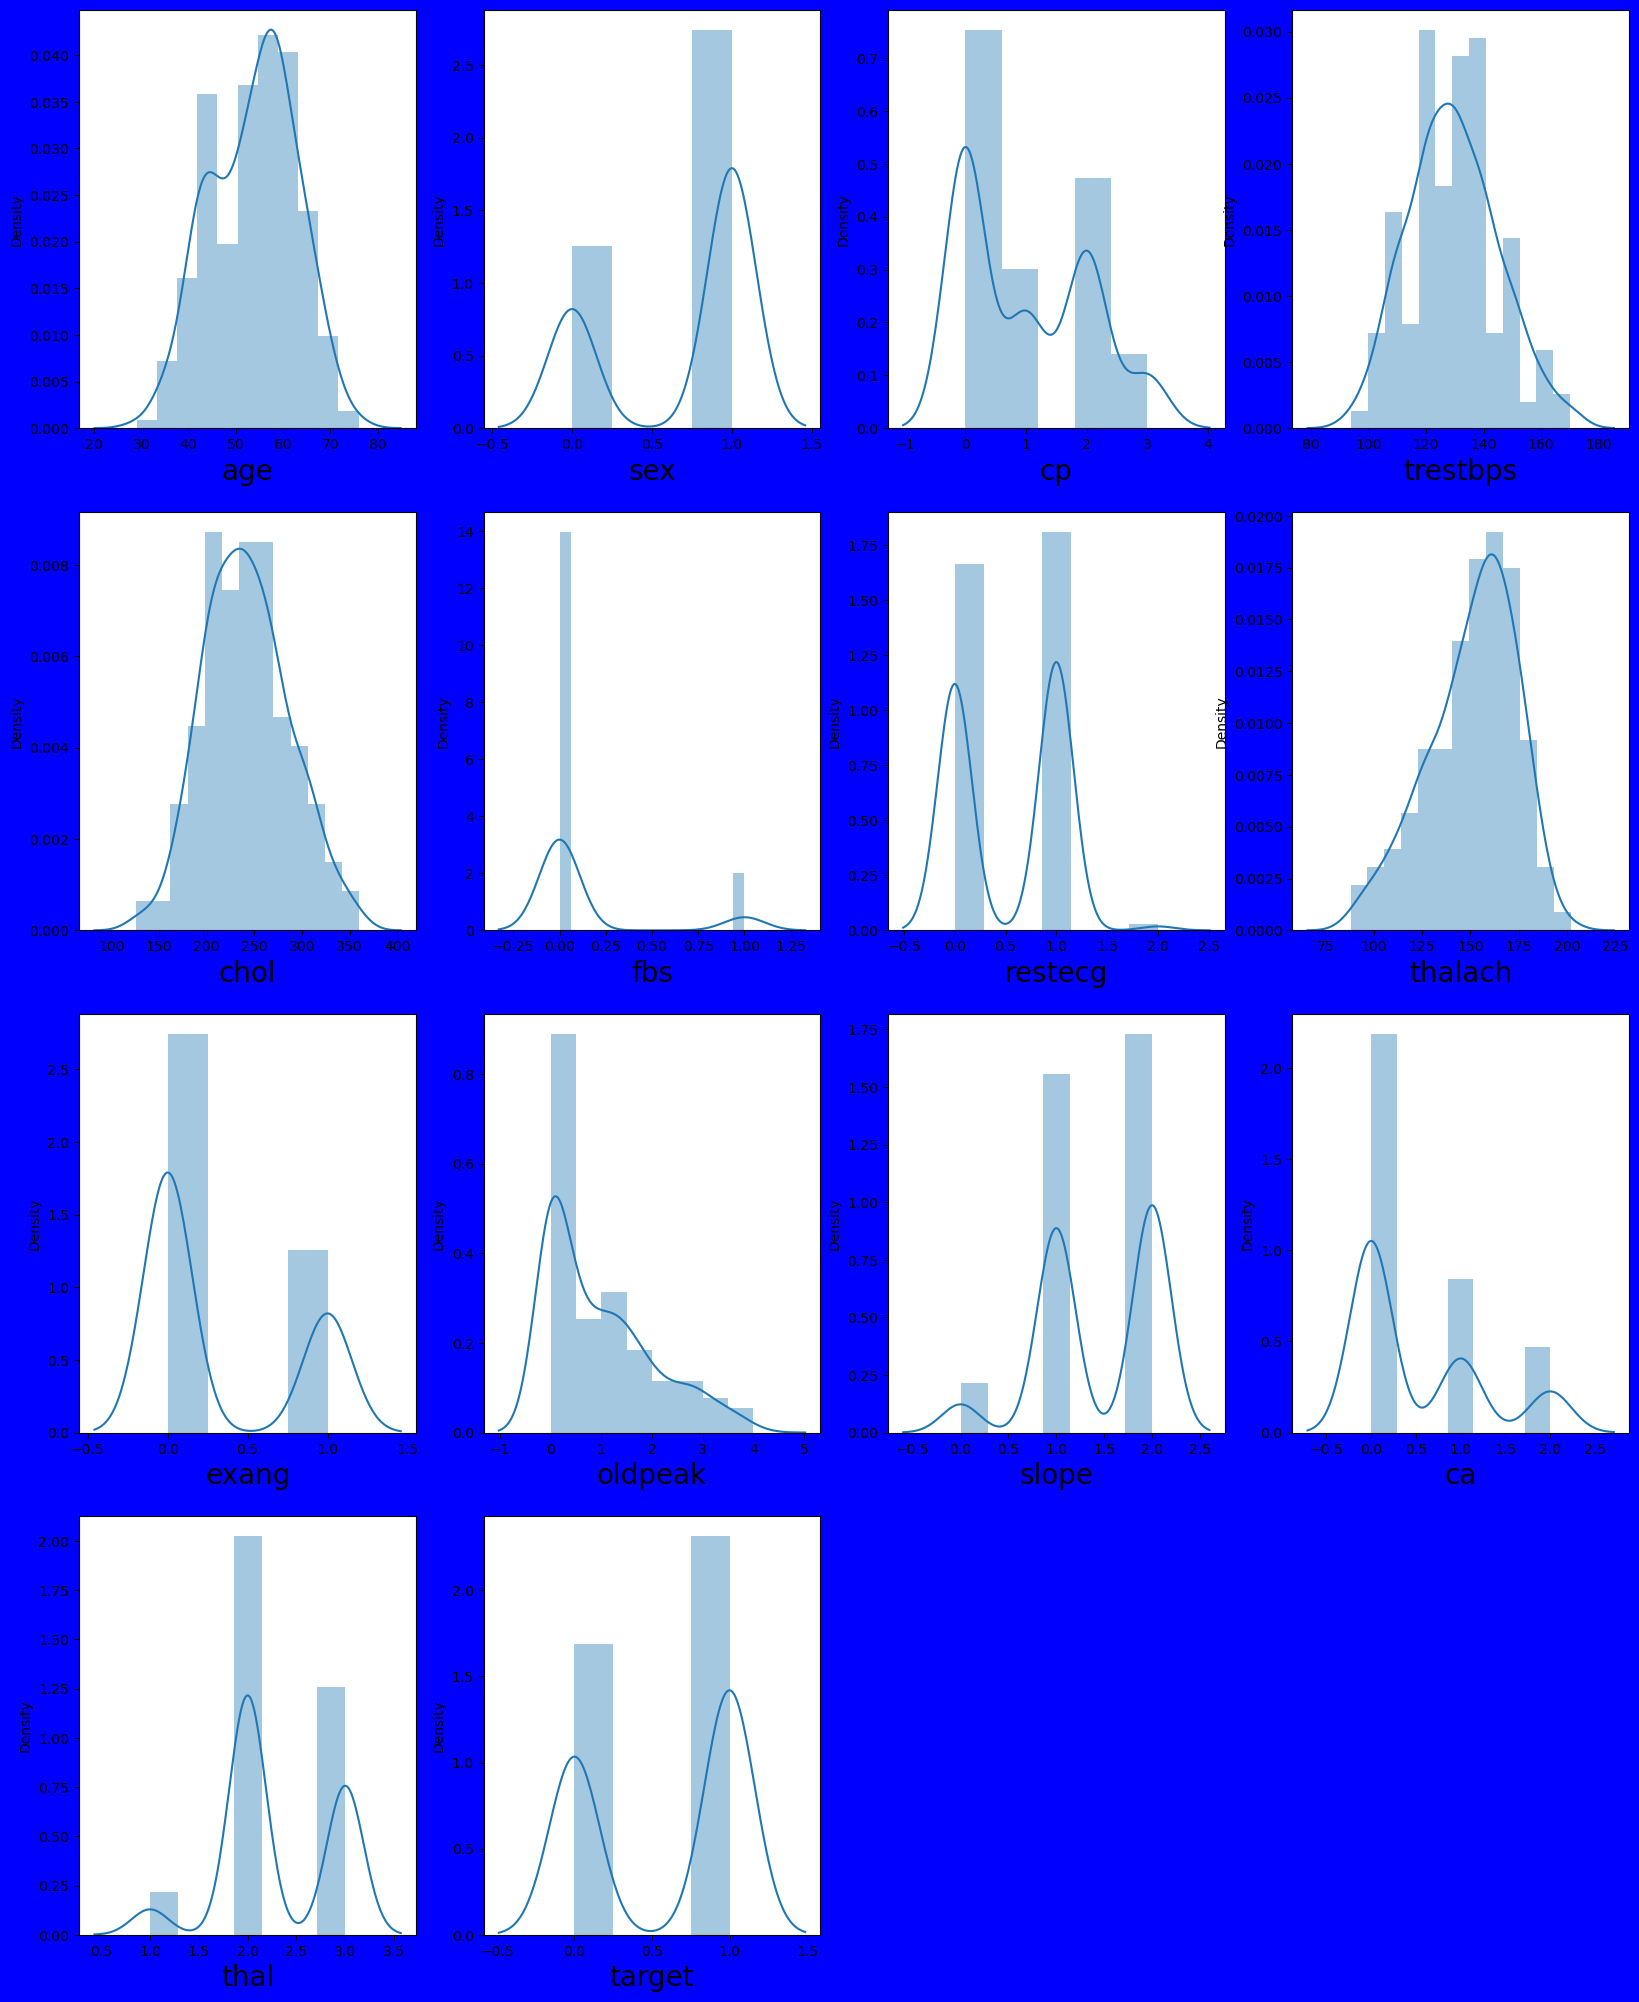

In [41]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [42]:
#finding the relationship
x = data.drop(columns = ['target'])
y = data['target']

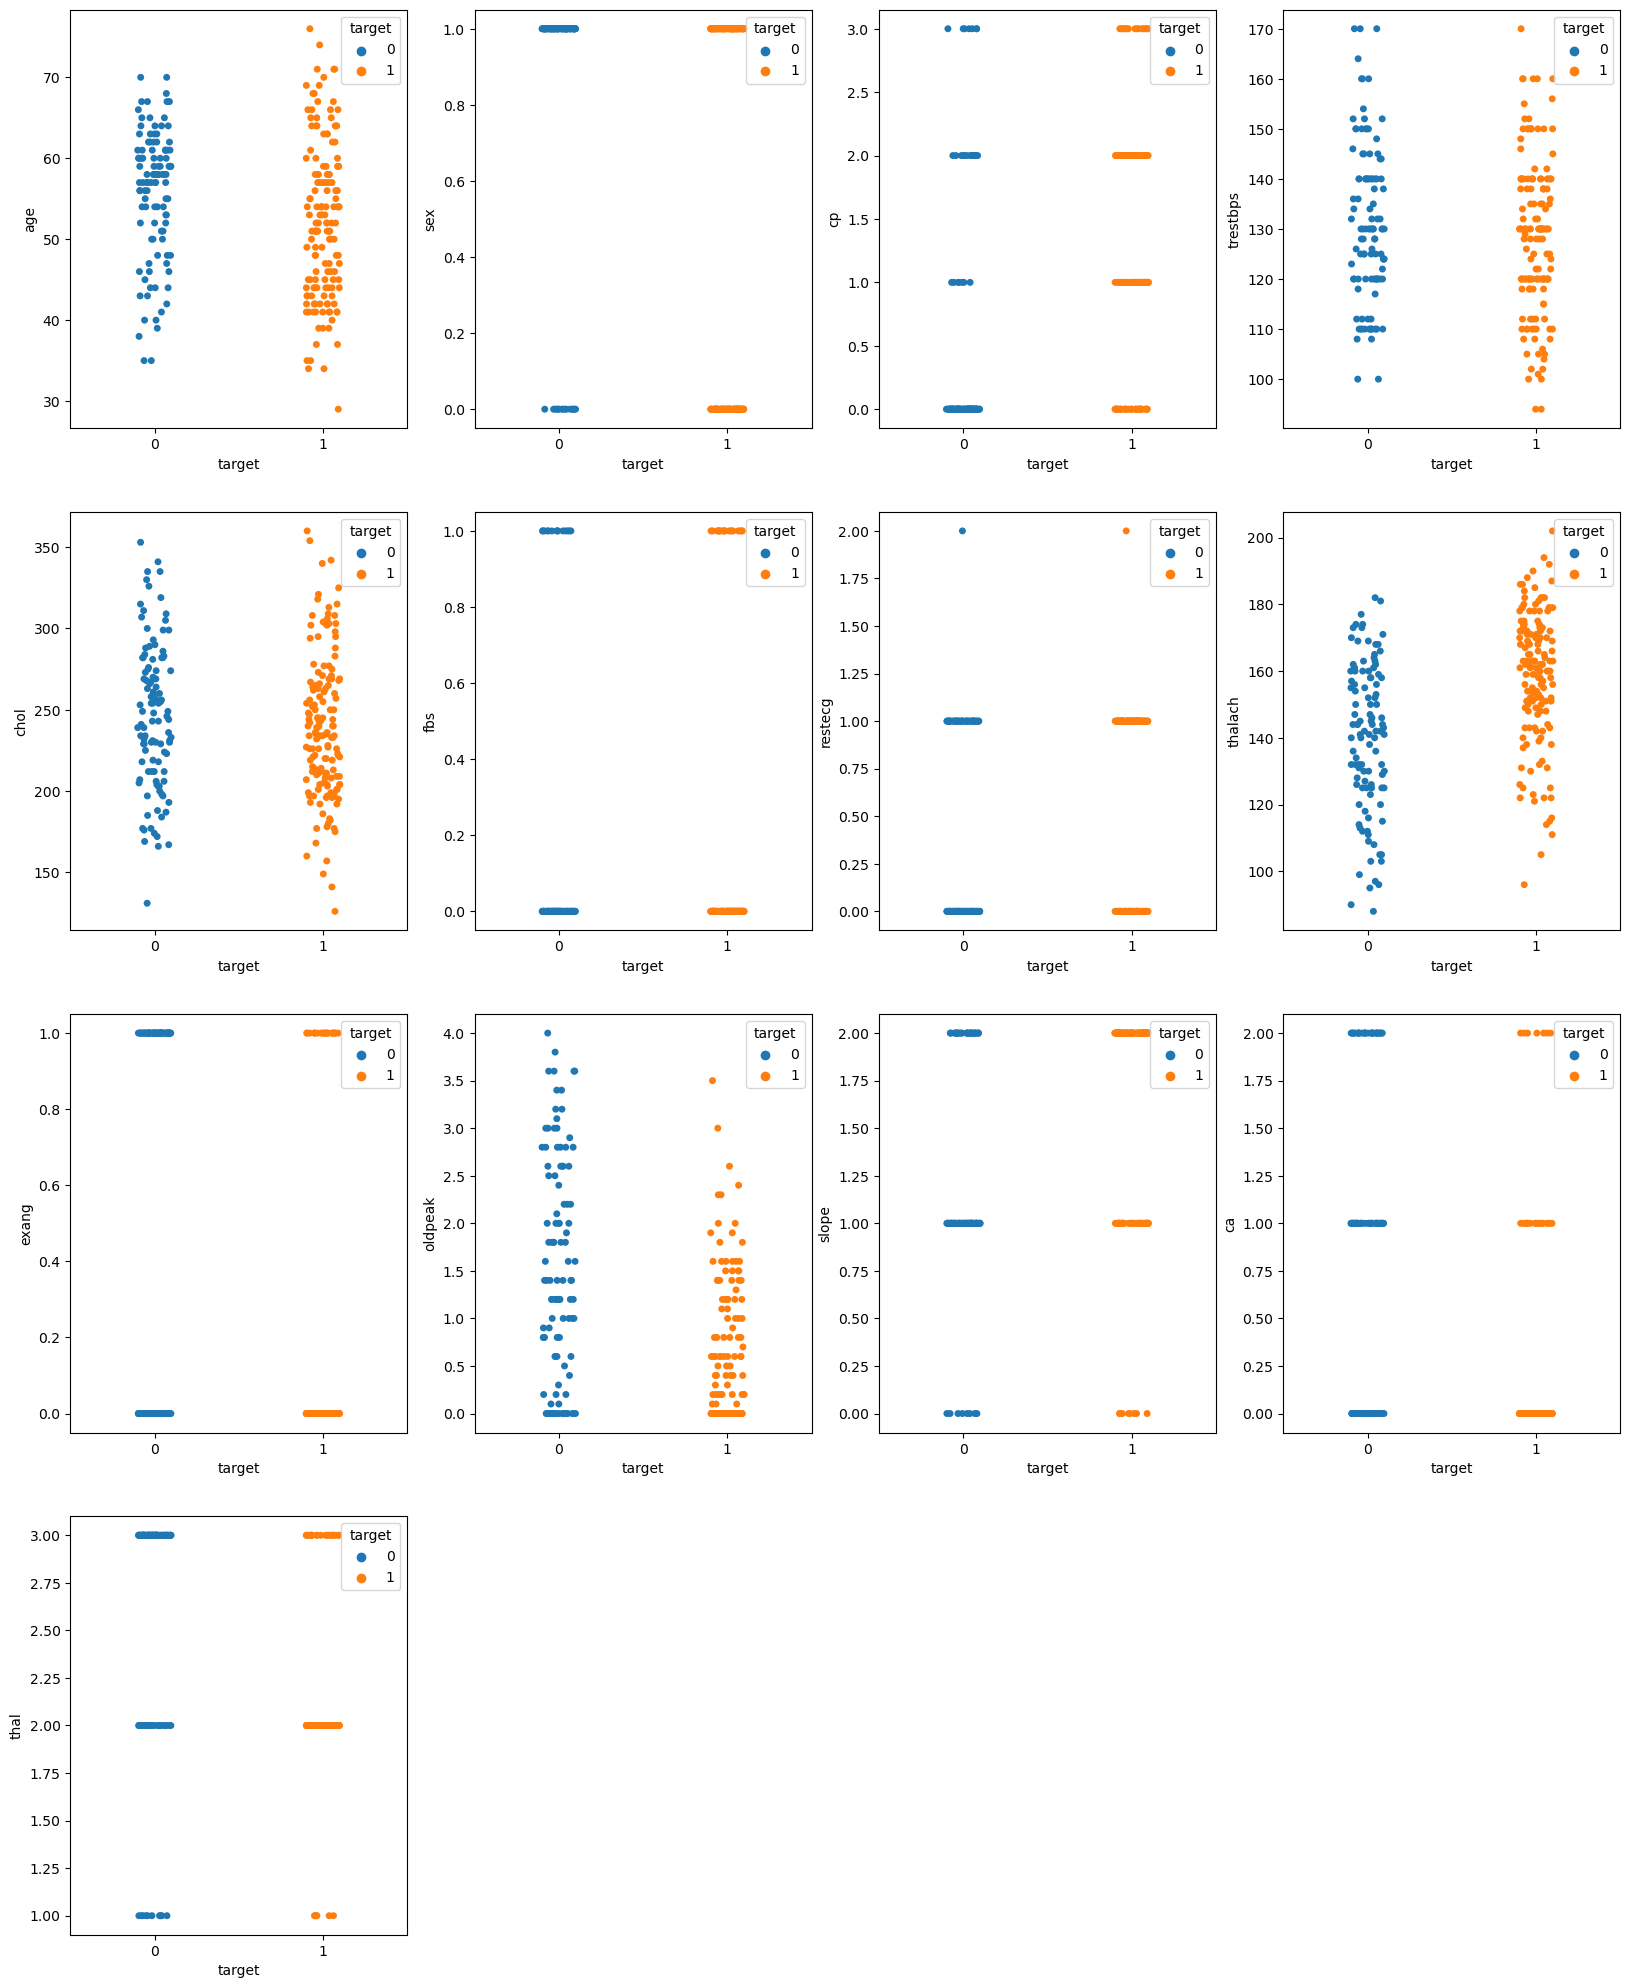

In [44]:
#checking how features are related
plt.figure(figsize=(20,25))
plotnumber = 1

for column in x:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(x=y, y=x[column],hue=y)       
    plotnumber+=1
plt.show()

In [45]:
#multicollinearity check
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
x_scaled.shape[1]

13

In [48]:
#finding variance factor in the scaled column i.e x_scaled.shape[1] (1/(1-R2))

In [49]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.534466,age
1,1.166097,sex
2,1.284079,cp
3,1.161502,trestbps
4,1.090931,chol
5,1.092925,fbs
6,1.080850,restecg
7,1.635202,thalach
8,1.484735,exang
9,1.678988,oldpeak


In [50]:
#using 5 as the vif score, there is no multicollinearity between the features, so all will be used

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [53]:
#Model building

In [54]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred = log_reg.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [57]:
log_reg.predict_proba(x_test)

array([[0.81341774, 0.18658226],
       [0.19216325, 0.80783675],
       [0.0382893 , 0.9617107 ],
       [0.54863275, 0.45136725],
       [0.00439578, 0.99560422],
       [0.10657269, 0.89342731],
       [0.95388059, 0.04611941],
       [0.84192635, 0.15807365],
       [0.84841277, 0.15158723],
       [0.00952918, 0.99047082],
       [0.00480047, 0.99519953],
       [0.76717479, 0.23282521],
       [0.64184824, 0.35815176],
       [0.4467709 , 0.5532291 ],
       [0.07019786, 0.92980214],
       [0.64237693, 0.35762307],
       [0.40733226, 0.59266774],
       [0.47702408, 0.52297592],
       [0.26184787, 0.73815213],
       [0.75009821, 0.24990179],
       [0.91255623, 0.08744377],
       [0.193219  , 0.806781  ],
       [0.12365265, 0.87634735],
       [0.97603872, 0.02396128],
       [0.14702345, 0.85297655],
       [0.07481273, 0.92518727],
       [0.15453838, 0.84546162],
       [0.16112188, 0.83887812],
       [0.57965241, 0.42034759],
       [0.77236492, 0.22763508],
       [0.

In [58]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[19,  5],
       [ 9, 33]], dtype=int64)

In [59]:
#model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7878787878787878

In [60]:
#checking recall, precision and F1 score

from sklearn.metrics import classification_report

In [61]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        24
           1       0.87      0.79      0.82        42

    accuracy                           0.79        66
   macro avg       0.77      0.79      0.78        66
weighted avg       0.80      0.79      0.79        66



In [62]:
#ROC  curve
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [63]:
print ('Threshold =', thresholds)
print ('True positive rate =', tpr)
print ('False positive rate = ',fpr)

Threshold = [inf  1.  0.]
True positive rate = [0.         0.78571429 1.        ]
False positive rate =  [0.         0.20833333 1.        ]


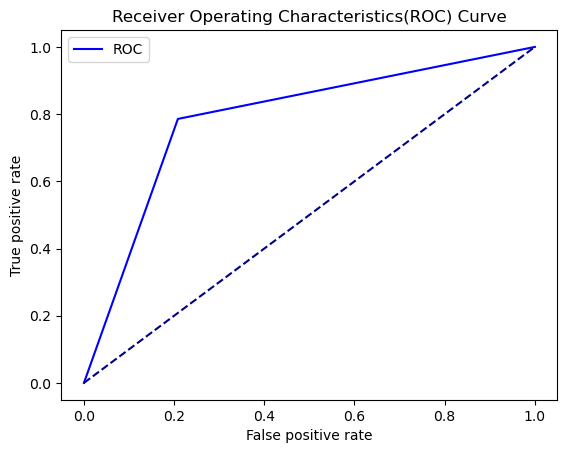

In [70]:
plt.plot(fpr,tpr, color ='blue', label = 'ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend()
plt.show()

In [71]:
auc_score = roc_auc_score(y_test,y_pred)
print (auc_score)

0.7886904761904762
